## 1.3 Model Selection

* 一般情况下，模型的复杂性直接影响到过拟合与否，模型过于复杂可能会导致**过拟合现象**，而模型过于简单又不能很好的描述数据特征。在模型选择过程中一般分为两个步骤，其一是模型的训练，然后是模型的验证；模型的训练用于训练模型的参数特征，模型的验证则是用于验证模型是否可靠，是否能很好的用于预测。


* **交叉验证**是一个很好的用于解决数据量较小的模型选择过程的方法。首先将数据集分为$S$份，然后每次选择其中$\left(S-1\right)/S$用于训练模型，剩余的数据用于验证模型的正确性，当循环完最终的$S$次后，取这么多次的预测结果平均值作为模型的性能指数。当然如果数据量非常小，可以采用**leave-one-out**方法用于选择模型，交叉验证次数$S$为数据个数$N$。


* 采用交叉验证的方法来防止过拟合会导致模型的训练复杂度上升，因为这种方法需要训练和验证多次，显然需要更好的方法。有AIC（信息量准则, Akaike，1974：最小化 $\ln p\left(\mathcal{D}|\mathbf{w}_{ML}\right) - M$, $M$表示模型中可调整参数的个数）,BIC（贝叶斯信息量准则） 规则。


## 1.4 The Curse of Dimensionality
（维数灾难）
对于如下图中所示的分类问题，其中不同颜色表示不同的类别，散点图仅取出了原始数据中的第6和第7维数据。现在需要判断一种‘x’的点属于哪一个，最简单的方法莫过于采用图中所示的方法，将二维图划分若干个格子，每个格子中的数据都属于同一个类别，而根据训练数据中该类别的点最多的数据进行划分。
![fig1.19](1.4_fig1.19.png)  ![fig1.20](1.4_fig1.20.png)

然而，当模型中的变量维数增大时，需要划分的格子个数就会呈指数级的增长
![fig1.21](1.4_fig1.21.png)

假设有D维数据，那么三次模型为：
$$
y\left(\mathbf{x}, \mathbf{w}\right) = \omega_0 + \sum_{i=1}^D\omega_i x_i +\sum_{i=1}^D\sum_{j=1}^D \omega_{ij}x_ix_j + \sum_{i=1}^D\sum_{j=1}^D \sum_{k=1}^D\omega_{ijk}x_ix_j x_k
$$
三次模型是指模型的次数为三次，其中需要穷举D维各种三次可能；因此在模型中，参数的个数正比于$D^M$。参数的个数随着维数幂数增长。


* 考虑一个比较直观的案例，一个半径为 $ r $ 的 $D$ 维超球体，考虑半径为 $ r=1 $ 和 $ r= 1-\epsilon $ 两个超球体之间的体积；由于超球体的体积为： $ V_D \left(r\right) = K_D r^D $，其中$ K_D $是和维数 $D$ 相关的一个参数。那么在两个球体之间的所占的比例可以计算为： 
$$ 
\frac{V_D\left(1\right) - V_D\left( 1-\epsilon \right)}{V_D\left(1\right) }= 1-\left(1- \epsilon\right)^D 
$$.

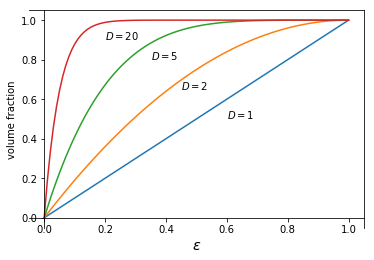

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline
N = 10;
epsilon_e = np.linspace(0,1,100)
fig,ax =plt.subplots();
frac_1 = 1-(1- epsilon_e)**1;
frac_2 = 1-(1- epsilon_e)**2;
frac_5 = 1-(1- epsilon_e)**5;
frac_20 = 1-(1- epsilon_e)**20;
plt.plot(epsilon_e, frac_1, epsilon_e , frac_2, epsilon_e, frac_5, epsilon_e, frac_20);
plt.xlabel('$\epsilon$',fontsize= 'x-large'); plt.ylabel('volume fraction');
plt.text(0.6,0.5, r'$D = 1$'); plt.text(0.45,0.65, r'$D = 2$'); plt.text(0.35,0.8, r'$D = 5$'); plt.text(0.2,0.9, r'$D = 20$');
ax.spines['bottom'].set_position(('data',0));
ax.spines['left'].set_position(('data',0));

从上图中可以看出，即使 $\epsilon$ 比较小，当维数比较大的时候，volume fraction 也是非常接近于1。 也即是说，当数据的维数比较大的时候，超球体的体积大多都集中在靠近球面的位置。

* 考虑一个更为深层次例子，切实关系到模式识别的问题，考虑一个多维空间中的高斯分布，也就是说在空间中的任意一维坐标都满足高斯分布（注：姑且假设是标准正太分布吧!）， 那么将卡迪尔坐标系转到极坐标系，我们可以获得关于任意点到极点距离的概率密度函数。
$$
p\left(r\right) = \frac{S_D r^{D-1}}{\left(2\pi \sigma^2\right)^{D/2}}\exp\left( -\frac{r^2}{2\sigma^2} \right)
$$
其中$S_D = \frac{2\pi^{D/2}}{\Gamma\left(\frac{D}{2}\right)}$ 是单位半径$D$维超球体的表面积。
也就是说，随着维数的增多，空间中的样本点越来越远离中心，也即高维空间中大部分数据分布在远离中心的一层**壳**上，**注：有个说法说，[原理原点的空间样本点比靠近原点的样本点更加难以区分](http://www.mamicode.com/info-detail-622305.html),(没有证明？)**
* [为什么数据远离中心会难以分类](http://m.blog.csdn.net/losteng/article/details/51156028)

* [为什么数据远离中心会难以分类2](http://blog.csdn.net/u010182633/article/details/45895493)


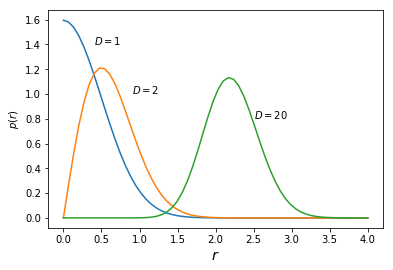

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.special import gamma
import math

%matplotlib inline
r = sp.linspace(0,4,60);
sigma_0 = 0.5;
D = 1; pr_1 = 2*math.pi**(D/2)/gamma(D/2)*r**(D-1)/(2*math.pi*sigma_0**2)**(D/2)*np.exp(-r**2/2/sigma_0**2);
D = 2; pr_2 = 2*math.pi**(D/2)/gamma(D/2)*r**(D-1)/(2*math.pi*sigma_0**2)**(D/2)*np.exp(-r**2/2/sigma_0**2);
D = 20; pr_20 = 2*math.pi**(D/2)/gamma(D/2)*r**(D-1)/(2*math.pi*sigma_0**2)**(D/2)*np.exp(-r**2/2/sigma_0**2);
plt.plot(r, pr_1, r, pr_2, r, pr_20);
plt.xlabel('$r$',fontsize= 'x-large'); plt.ylabel('$p( r )$');
plt.text(0.4,1.4, r'$D = 1$'); plt.text(0.9,1.0, r'$D = 2$');plt.text(2.5,0.8, r'$D = 20$');